In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load dataset
df = pd.read_csv("full_grouped.csv")

# check the first rows
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [17]:
df.shape

(35156, 10)

In [19]:
df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [21]:
# Make sure there are no missing values
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [23]:
# Check for duplicates
df.duplicated().sum()

0

In [26]:
# perform basic statistics
print(df.describe())

          Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.0

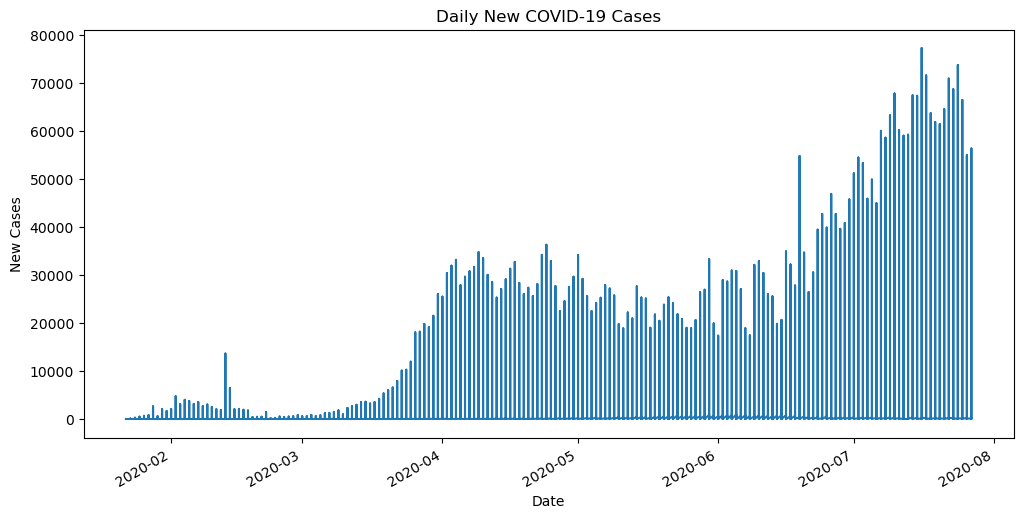

In [28]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot daily new cases
df['New cases'].plot(figsize=(12, 6), title='Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606


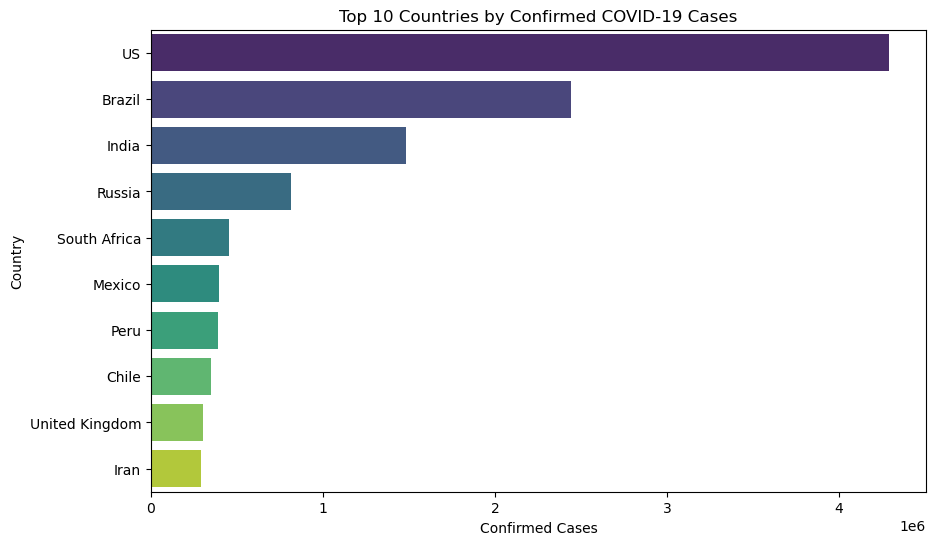

In [32]:
# Total confirmed cases by country
country_cases = df.groupby('Country/Region')['Confirmed'].max().reset_index()

# Top 10 countries with the highest cases
top_countries = country_cases.nlargest(10, 'Confirmed')
print(top_countries)

# Bar plot for top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, hue='Country/Region', palette='viridis', legend=False)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

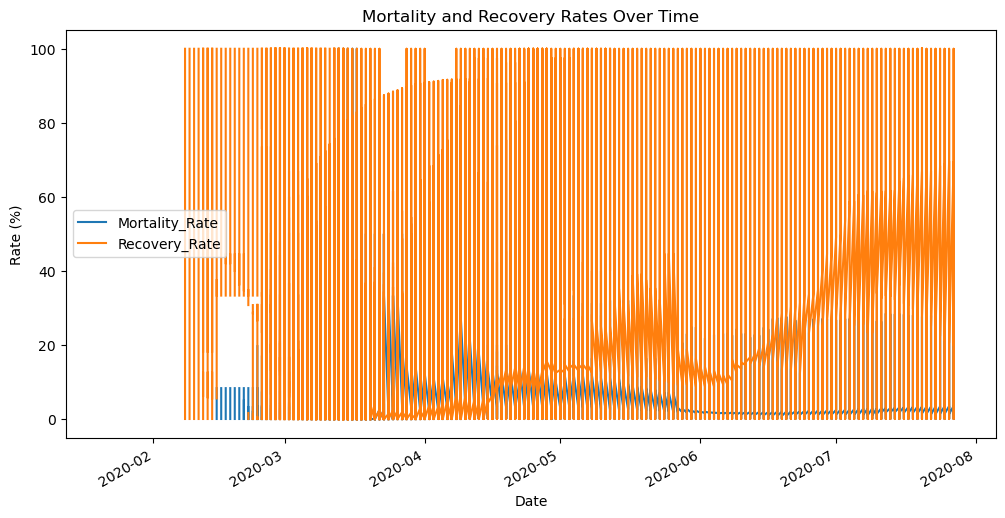

In [38]:
# Calculate mortality rate (Deaths / Confirmed * 100)
df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed']) * 100

# Calculate recovery rate (Recovered / Confirmed * 100)
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Plot mortality and recovery rates over time
df[['Mortality_Rate', 'Recovery_Rate']].plot(figsize=(12, 6), title='Mortality and Recovery Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.show()

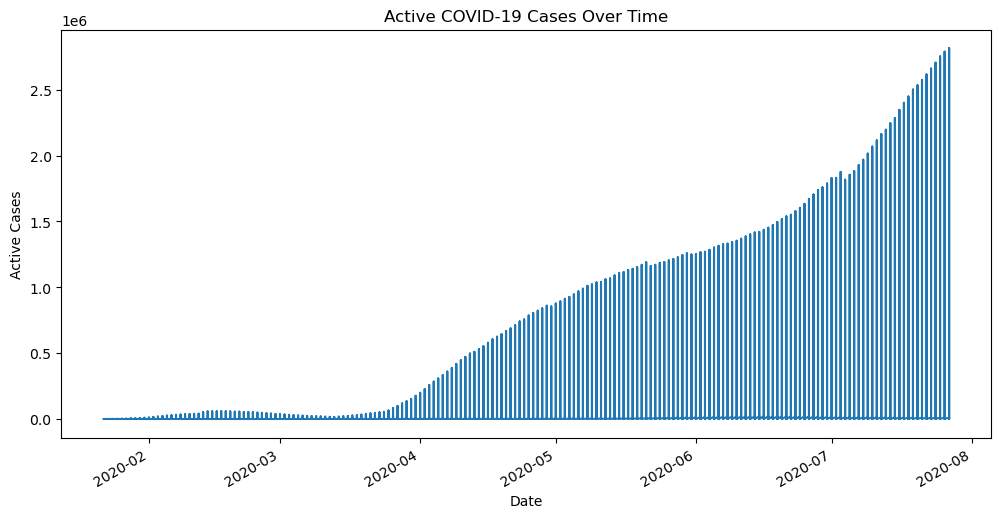

In [40]:
# Plot active cases over time
df['Active'].plot(figsize=(12, 6), title='Active COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.show()

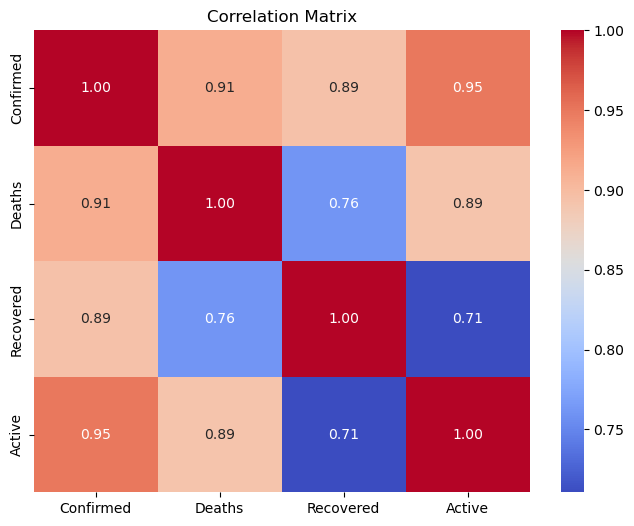

In [42]:
# Correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

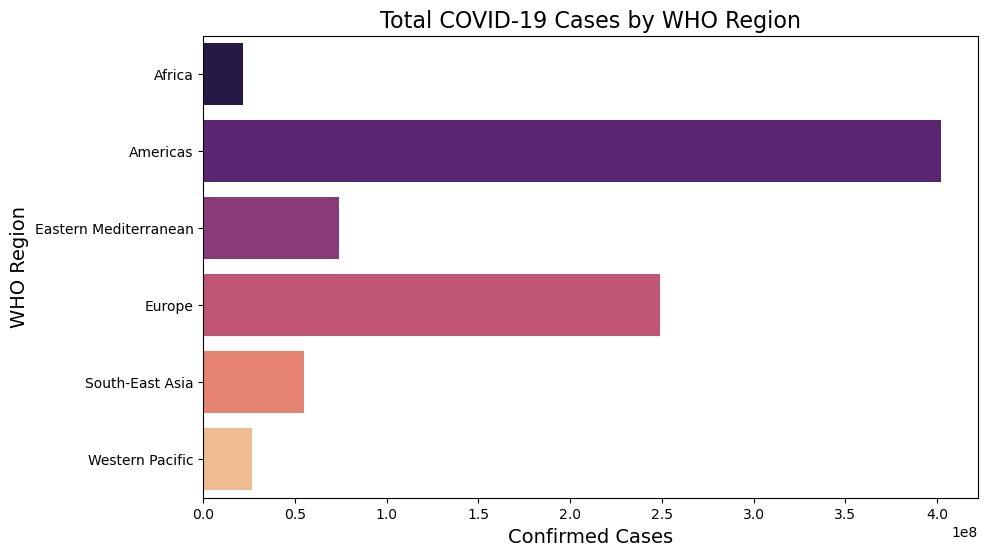

In [46]:
# Total cases by WHO Region
who_region_cases = df.groupby('WHO Region')['Confirmed'].sum().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='WHO Region', data=who_region_cases, hue='WHO Region', palette='magma', legend=False)
plt.title('Total COVID-19 Cases by WHO Region', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=14)
plt.ylabel('WHO Region', fontsize=14)
plt.show()

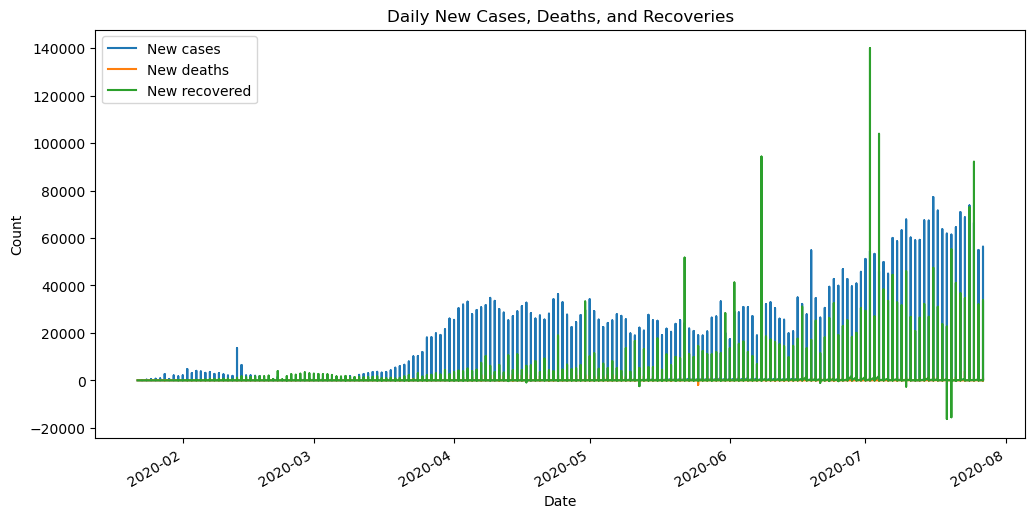

In [48]:
# Plot new cases, deaths, and recoveries
df[['New cases', 'New deaths', 'New recovered']].plot(figsize=(12, 6), title='Daily New Cases, Deaths, and Recoveries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [62]:
# Define the conclusions
conclusions = [
    "1. **Global Impact of COVID-19**:",
    "   - The US, Brazil, and India are the top three countries with the highest number of confirmed cases.",
    "   - Other heavily affected countries include Russia, South Africa, Mexico, Peru, Chile, United Kingdom, and Iran.",
    "",
    "2. **Strong Correlations Between Key Metrics**:",
    "   - Confirmed Cases vs. Deaths (0.91): Higher case numbers are closely associated with higher deaths.",
    "   - Confirmed Cases vs. Active Cases (0.89): Higher confirmed cases lead to a significant increase in active cases.",
    "   - Deaths vs. Active Cases (0.71): Higher active cases are moderately associated with higher deaths.",
    "",
    "3. **Trends in Daily New Cases**:",
    "   - The plot of daily new cases shows multiple waves of infections, with peaks reaching up to 77,255 new cases in a single day.",
    "   - These fluctuations likely correspond to new variants, changes in public health measures, or seasonal factors.",
    "",
    "4. **Active Cases Over Time**:",
    "   - The trend in active cases reveals periods of rapid spread (peaks) and recovery/containment (troughs).",
    "   - This highlights the importance of monitoring active cases to understand the current state of the pandemic.",
    "",
    "5. **Mortality and Recovery Rates**:",
    "   - Mortality Rate: The ratio of deaths to confirmed cases provides insight into the severity of the virus.",
    "   - Recovery Rate: The ratio of recoveries to confirmed cases reflects the effectiveness of healthcare systems and containment strategies.",
    "",
    "6. **WHO Region Analysis**:",
    "   - The Americas and Europe are likely the most affected WHO regions, given the high case numbers in the US, Brazil, and the UK.",
    "   - This regional analysis can help identify areas that need targeted support or resources."
]

# Print the conclusions
print("COVID-19 Data Analysis Conclusions:\n")
for line in conclusions:
    print(line)

COVID-19 Data Analysis Conclusions:

1. **Global Impact of COVID-19**:
   - The US, Brazil, and India are the top three countries with the highest number of confirmed cases.
   - Other heavily affected countries include Russia, South Africa, Mexico, Peru, Chile, United Kingdom, and Iran.

2. **Strong Correlations Between Key Metrics**:
   - Confirmed Cases vs. Deaths (0.91): Higher case numbers are closely associated with higher deaths.
   - Confirmed Cases vs. Active Cases (0.89): Higher confirmed cases lead to a significant increase in active cases.
   - Deaths vs. Active Cases (0.71): Higher active cases are moderately associated with higher deaths.

3. **Trends in Daily New Cases**:
   - The plot of daily new cases shows multiple waves of infections, with peaks reaching up to 77,255 new cases in a single day.
   - These fluctuations likely correspond to new variants, changes in public health measures, or seasonal factors.

4. **Active Cases Over Time**:
   - The trend in active cas